# Захаров Андрей Максимович
## Вариант 13

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

### 1. Вывести информацию о наборе данных.

In [496]:
df = pd.read_csv("Исходные данные.csv", low_memory=False)
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [497]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [498]:
df.shape

(100000, 28)

### 2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками. Num_of_Loan

In [499]:
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,-100
181,0
182,0
183,0
184,-100
185,-100
186,3
187,3
188,3
189,3


In [500]:
uniq = df["Num_of_Loan"].unique()
uniq

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [501]:
zamena = dict()

for i in uniq:
    if '_' in i and i not in zamena:
        correct = i.replace('_', '')
        zamena[i] = correct
        
zamena

{'0_': '0',
 '3_': '3',
 '2_': '2',
 '5_': '5',
 '8_': '8',
 '9_': '9',
 '4_': '4',
 '7_': '7',
 '1_': '1',
 '6_': '6',
 '597_': '597',
 '92_': '92',
 '1347_': '1347',
 '1185_': '1185',
 '235_': '235',
 '1459_': '1459',
 '1320_': '1320',
 '630_': '630',
 '359_': '359',
 '1225_': '1225',
 '131_': '131',
 '1311_': '1311',
 '1129_': '1129',
 '785_': '785',
 '143_': '143',
 '1131_': '1131',
 '27_': '27',
 '1171_': '1171',
 '227_': '227',
 '378_': '378',
 '1219_': '1219',
 '527_': '527',
 '1027_': '1027',
 '696_': '696',
 '1132_': '1132'}

In [502]:
df = df.replace({"Num_of_Loan" : zamena})
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [503]:
for i in df["Num_of_Loan"]:
    try:
        int(i)
    except:
        print("Ошибка c", i)
else:
    print("Ошибочных данных нет")

Ошибочных данных нет


In [504]:
df.loc[df['Num_of_Loan'] < '0'] = np.nan
df[['Num_of_Loan']].loc[180:190]

,Num_of_Loan
180,NaN
181,0
182,0
183,0
184,NaN
185,NaN
186,3
187,3
188,3
189,3


### 3. В соответствии с вариантом преобразовать признаки, которые должны быть количественными в числовой формат.

In [505]:
df["Num_of_Loan"].isna().sum()

3876

In [506]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors='coerce')
print(df["Num_of_Loan"].dtypes)
df["Num_of_Loan"].isna().sum()

float64


3876

### 4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).

In [507]:
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months
6,22 Years and 7 Months
7,NaN
8,26 Years and 7 Months
9,26 Years and 8 Months


In [508]:
cha = list(map(lambda x: int(x.split()[0]) * 12 + int(x.split()[3]) if x is not np.NaN else x, df["Credit_History_Age"].tolist()))
cha[:10]

[265, nan, 267, 268, 269, 270, 271, nan, 319, 320]

In [509]:
df["Credit_History_Age"] = cha
df[["Credit_History_Age"]].head(10)

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
5,270.0
6,271.0
7,NaN
8,319.0
9,320.0


### 5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков. Заменить аномальные значения пропусками.

In [510]:
df[["Age"]].head(10)

,Age
0,23
1,23
2,-500
3,23
4,23
5,23
6,23
7,23
8,28_
9,28


In [511]:
ages = df["Age"].unique()
ages

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [512]:
z = dict()

for age in ages:
    if age is not np.nan and '_' in age:
        correct = age.replace('_', '')
        z[age] = correct

z

{'28_': '28',
 '34_': '34',
 '30_': '30',
 '24_': '24',
 '33_': '33',
 '35_': '35',
 '40_': '40',
 '37_': '37',
 '54_': '54',
 '21_': '21',
 '20_': '20',
 '43_': '43',
 '38_': '38',
 '18_': '18',
 '2111_': '2111',
 '46_': '46',
 '16_': '16',
 '19_': '19',
 '47_': '47',
 '53_': '53',
 '25_': '25',
 '27_': '27',
 '55_': '55',
 '42_': '42',
 '48_': '48',
 '49_': '49',
 '50_': '50',
 '32_': '32',
 '22_': '22',
 '17_': '17',
 '29_': '29',
 '15_': '15',
 '51_': '51',
 '31_': '31',
 '26_': '26',
 '39_': '39',
 '14_': '14',
 '36_': '36',
 '44_': '44',
 '7670_': '7670',
 '45_': '45',
 '23_': '23',
 '41_': '41',
 '52_': '52',
 '733_': '733',
 '5769_': '5769',
 '4383_': '4383',
 '56_': '56',
 '2650_': '2650',
 '3307_': '3307',
 '6962_': '6962',
 '5589_': '5589',
 '6556_': '6556',
 '1447_': '1447',
 '8153_': '8153',
 '3834_': '3834',
 '6744_': '6744',
 '6471_': '6471',
 '7723_': '7723',
 '6408_': '6408',
 '3502_': '3502',
 '7316_': '7316',
 '1102_': '1102',
 '8669_': '8669',
 '2463_': '2463',
 '30

In [513]:
df = df.replace({'Age' : z})
df[['Age']]

,Age
0,23
1,23
2,-500
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [514]:
df['Age'] = df['Age'].astype(np.float64)
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [515]:
df[(df['Age'] < 18) | (df['Age'] > 115)].shape

(8174, 28)

In [516]:
df.loc[(df['Age'] < 18) | (df['Age'] > 115), 'Age'] = np.nan
df[['Age']].head(10)

,Age
0,23.0
1,23.0
2,NaN
3,23.0
4,23.0
5,23.0
6,23.0
7,23.0
8,28.0
9,28.0


### 6. Восстановить пропущенные значения признака. Сравнить распределения признака до и после восстановления.

### Num_of_Loan

In [517]:
tmp = df[['Num_of_Loan']].copy()
tmp['Num_of_Loan_zamena'] = df['Num_of_Loan']
tmp.head(15)

,Num_of_Loan,Num_of_Loan_zamena
0,4.0,4.0
1,4.0,4.0
2,4.0,4.0
3,4.0,4.0
4,4.0,4.0
5,4.0,4.0
6,4.0,4.0
7,4.0,4.0
8,1.0,1.0
9,1.0,1.0


In [518]:
tmp.isna().sum()

Num_of_Loan           3876
Num_of_Loan_zamena    3876
dtype: int64

In [558]:
NoL = tmp['Num_of_Loan']
NoL.tolist()[400:430]

[6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 nan,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0]

In [520]:
sub = [NoL[i:i + 8] for i in range(0, len(NoL), 8)]
sub[100:106]

[800    1.0
 801    1.0
 802    1.0
 803    1.0
 804    1.0
 805    1.0
 806    1.0
 807    1.0
 Name: Num_of_Loan, dtype: float64,
 808       4.0
 809       NaN
 810    1464.0
 811       4.0
 812       4.0
 813       4.0
 814       4.0
 815       4.0
 Name: Num_of_Loan, dtype: float64,
 816    4.0
 817    4.0
 818    4.0
 819    4.0
 820    4.0
 821    4.0
 822    4.0
 823    4.0
 Name: Num_of_Loan, dtype: float64,
 824    1.0
 825    1.0
 826    1.0
 827    1.0
 828    1.0
 829    1.0
 830    1.0
 831    1.0
 Name: Num_of_Loan, dtype: float64,
 832    6.0
 833    6.0
 834    6.0
 835    6.0
 836    6.0
 837    6.0
 838    6.0
 839    6.0
 Name: Num_of_Loan, dtype: float64,
 840    4.0
 841    4.0
 842    4.0
 843    4.0
 844    4.0
 845    4.0
 846    4.0
 847    4.0
 Name: Num_of_Loan, dtype: float64]

In [521]:
for i in range(len(sub)):
    if sub[i].isna().sum() == 8:
        print(sub[i])
    else:
        mode = sub[i].mode().iloc[0]
        sub[i] = sub[i].apply(lambda x: mode if not pd.isna(x) and x != mode else x)

sub[100:106]

[800    1.0
 801    1.0
 802    1.0
 803    1.0
 804    1.0
 805    1.0
 806    1.0
 807    1.0
 Name: Num_of_Loan, dtype: float64,
 808    4.0
 809    NaN
 810    4.0
 811    4.0
 812    4.0
 813    4.0
 814    4.0
 815    4.0
 Name: Num_of_Loan, dtype: float64,
 816    4.0
 817    4.0
 818    4.0
 819    4.0
 820    4.0
 821    4.0
 822    4.0
 823    4.0
 Name: Num_of_Loan, dtype: float64,
 824    1.0
 825    1.0
 826    1.0
 827    1.0
 828    1.0
 829    1.0
 830    1.0
 831    1.0
 Name: Num_of_Loan, dtype: float64,
 832    6.0
 833    6.0
 834    6.0
 835    6.0
 836    6.0
 837    6.0
 838    6.0
 839    6.0
 Name: Num_of_Loan, dtype: float64,
 840    4.0
 841    4.0
 842    4.0
 843    4.0
 844    4.0
 845    4.0
 846    4.0
 847    4.0
 Name: Num_of_Loan, dtype: float64]

In [522]:
tmp['Num_of_Loan'] = pd.concat(sub, ignore_index=True)
tmp['Num_of_Loan'].unique()

array([ 4.,  1.,  3., nan,  0.,  2.,  7.,  5.,  6.,  8.,  9.])

In [523]:
for i in range(len(sub)):
    mode = sub[i].mode().iloc[0]
    sub[i] = sub[i].apply(lambda x: mode if pd.isna(x) else x)

sub[100:106]

[800    1.0
 801    1.0
 802    1.0
 803    1.0
 804    1.0
 805    1.0
 806    1.0
 807    1.0
 Name: Num_of_Loan, dtype: float64,
 808    4.0
 809    4.0
 810    4.0
 811    4.0
 812    4.0
 813    4.0
 814    4.0
 815    4.0
 Name: Num_of_Loan, dtype: float64,
 816    4.0
 817    4.0
 818    4.0
 819    4.0
 820    4.0
 821    4.0
 822    4.0
 823    4.0
 Name: Num_of_Loan, dtype: float64,
 824    1.0
 825    1.0
 826    1.0
 827    1.0
 828    1.0
 829    1.0
 830    1.0
 831    1.0
 Name: Num_of_Loan, dtype: float64,
 832    6.0
 833    6.0
 834    6.0
 835    6.0
 836    6.0
 837    6.0
 838    6.0
 839    6.0
 Name: Num_of_Loan, dtype: float64,
 840    4.0
 841    4.0
 842    4.0
 843    4.0
 844    4.0
 845    4.0
 846    4.0
 847    4.0
 Name: Num_of_Loan, dtype: float64]

In [524]:
tmp['Num_of_Loan_zamena'] = pd.concat(sub, ignore_index=True)
tmp['Num_of_Loan_zamena'].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

In [525]:
NoL = tmp['Num_of_Loan']
NoL = NoL.dropna()
NoL_zam = tmp['Num_of_Loan_zamena']
len(NoL), len(NoL_zam)

(96124, 100000)

In [526]:
df['Num_of_Loan'] = NoL_zam

In [527]:
NoL_uniq, NoL_freq = np.unique(NoL, return_counts=True)
NoL_zam_uniq, NoL_zam_freq = np.unique(NoL_zam, return_counts=True)
list(zip(NoL_uniq, NoL_freq)), list(zip(NoL_zam_uniq, NoL_zam_freq))

([(0.0, 10991),
  (1.0, 10670),
  (2.0, 15099),
  (3.0, 15168),
  (4.0, 14837),
  (5.0, 7221),
  (6.0, 7838),
  (7.0, 7375),
  (8.0, 3207),
  (9.0, 3718)],
 [(0.0, 11408),
  (1.0, 11128),
  (2.0, 15712),
  (3.0, 15752),
  (4.0, 15456),
  (5.0, 7528),
  (6.0, 8144),
  (7.0, 7680),
  (8.0, 3336),
  (9.0, 3856)])

In [528]:
NoL_epmf = (NoL_freq / len(NoL)).round(3)
NoL_zam_epmf = (NoL_zam_freq / len(NoL_zam)).round(3)
list(zip(NoL_uniq, NoL_epmf)), list(zip(NoL_zam_uniq, NoL_zam_epmf))

([(0.0, 0.114),
  (1.0, 0.111),
  (2.0, 0.157),
  (3.0, 0.158),
  (4.0, 0.154),
  (5.0, 0.075),
  (6.0, 0.082),
  (7.0, 0.077),
  (8.0, 0.033),
  (9.0, 0.039)],
 [(0.0, 0.114),
  (1.0, 0.111),
  (2.0, 0.157),
  (3.0, 0.158),
  (4.0, 0.155),
  (5.0, 0.075),
  (6.0, 0.081),
  (7.0, 0.077),
  (8.0, 0.033),
  (9.0, 0.039)])

In [529]:
NoL_epmf.sum(), NoL_zam_epmf.sum()

(1.0, 1.0)

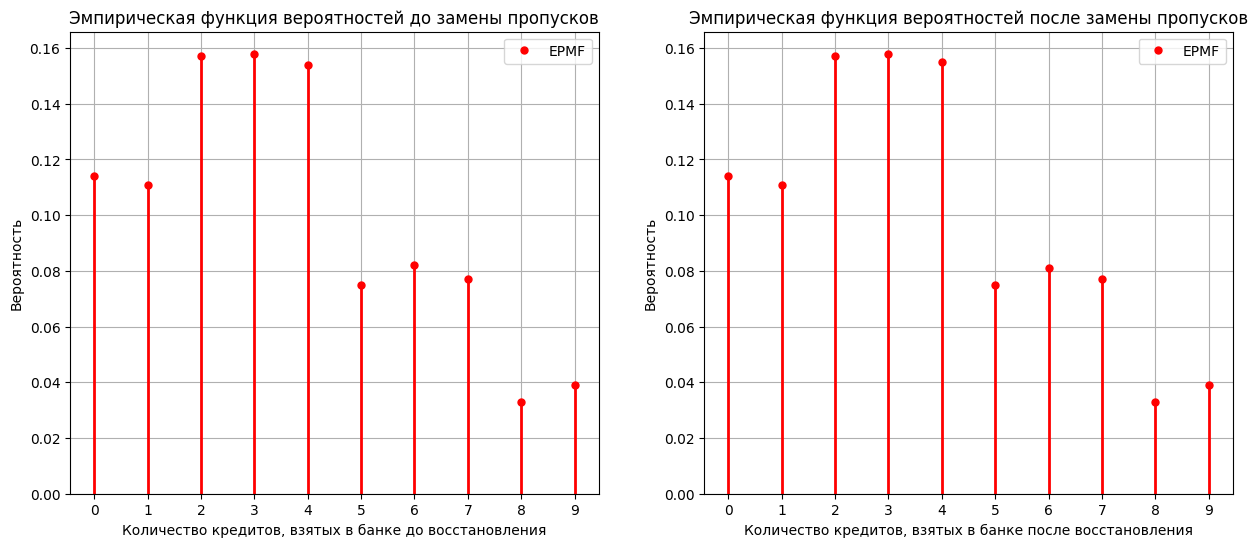

In [530]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(NoL_uniq, NoL_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(NoL_uniq, 0, NoL_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей до замены пропусков')
plt.xlabel('Количество кредитов, взятых в банке до восстановления')
plt.ylabel('Вероятность')
plt.xticks(NoL.unique())
plt.ylim(0)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(NoL_zam_uniq, NoL_zam_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(NoL_zam_uniq, 0, NoL_zam_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей после замены пропусков')
plt.xlabel('Количество кредитов, взятых в банке после восстановления')
plt.ylabel('Вероятность')
plt.xticks(NoL_zam.unique())
plt.legend()
plt.ylim(0)
plt.grid()

plt.show()

### Monthly_Balance

In [531]:
df['Monthly_Balance'].isna().sum()

5034

In [532]:
df[['Monthly_Balance']].head(10)

,Monthly_Balance
0,312.49408867943663
1,284.62916249607184
2,331.2098628537912
3,223.45130972736786
4,341.48923103222177
5,340.4792117872438
6,244.5653167062043
7,358.12416760938714
8,470.69062692529184
9,484.5912142650067


In [533]:
zamena = dict()

for i in df['Monthly_Balance']:
    if i is not np.nan and '_' in i:
        zamena[i] = np.nan

zamena

{'__-333333333333333333333333333__': nan}

In [534]:
df = df.replace({'Monthly_Balance' : zamena})

In [535]:
df['Monthly_Balance'].isna().sum()

5043

In [536]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = np.round(df['Monthly_Balance'], decimals=0)
df[['Monthly_Balance']].head(5)

,Monthly_Balance
0,312.0
1,285.0
2,331.0
3,223.0
4,341.0


In [537]:
MB = df['Monthly_Balance']
sub = [MB[i:i + 8] for i in range(0, len(MB), 8)]
sub[100:106]

[800    712.0
 801    751.0
 802    579.0
 803    694.0
 804    772.0
 805    720.0
 806    467.0
 807    287.0
 Name: Monthly_Balance, dtype: float64,
 808    417.0
 809      NaN
 810    950.0
 811    641.0
 812    833.0
 813    514.0
 814    582.0
 815    893.0
 Name: Monthly_Balance, dtype: float64,
 816    366.0
 817      NaN
 818    439.0
 819    500.0
 820    358.0
 821    382.0
 822    460.0
 823    387.0
 Name: Monthly_Balance, dtype: float64,
 824    185.0
 825    324.0
 826    379.0
 827    405.0
 828    289.0
 829    377.0
 830    292.0
 831    350.0
 Name: Monthly_Balance, dtype: float64,
 832    243.0
 833    262.0
 834    371.0
 835    349.0
 836    364.0
 837    420.0
 838    355.0
 839    205.0
 Name: Monthly_Balance, dtype: float64,
 840    391.0
 841    225.0
 842    362.0
 843    375.0
 844    413.0
 845    327.0
 846    424.0
 847    403.0
 Name: Monthly_Balance, dtype: float64]

In [538]:
for i in range(len(sub)):
    if sub[i].isna().sum() == 8:
        print(sub[i])
    else:
        median = sub[i].median()
        sub[i] = sub[i].apply(lambda x: median if pd.isna(x) else x)

sub[100:106]

[800    712.0
 801    751.0
 802    579.0
 803    694.0
 804    772.0
 805    720.0
 806    467.0
 807    287.0
 Name: Monthly_Balance, dtype: float64,
 808    417.0
 809    641.0
 810    950.0
 811    641.0
 812    833.0
 813    514.0
 814    582.0
 815    893.0
 Name: Monthly_Balance, dtype: float64,
 816    366.0
 817    387.0
 818    439.0
 819    500.0
 820    358.0
 821    382.0
 822    460.0
 823    387.0
 Name: Monthly_Balance, dtype: float64,
 824    185.0
 825    324.0
 826    379.0
 827    405.0
 828    289.0
 829    377.0
 830    292.0
 831    350.0
 Name: Monthly_Balance, dtype: float64,
 832    243.0
 833    262.0
 834    371.0
 835    349.0
 836    364.0
 837    420.0
 838    355.0
 839    205.0
 Name: Monthly_Balance, dtype: float64,
 840    391.0
 841    225.0
 842    362.0
 843    375.0
 844    413.0
 845    327.0
 846    424.0
 847    403.0
 Name: Monthly_Balance, dtype: float64]

In [539]:
MB_zam = pd.concat(sub, ignore_index=True)
MB = MB.dropna()
len(MB), len(MB_zam)

(94957, 100000)

In [540]:
df['Monthly_Balance'] = MB_zam

In [541]:
MB_uniq, MB_freq = np.unique(MB, return_counts=True)
MB_zam_uniq, MB_zam_freq = np.unique(MB_zam, return_counts=True)

In [542]:
MB_epmf = (MB_freq / len(MB)).round(3)
MB_zam_epmf = (MB_zam_freq / len(MB_zam)).round(3)

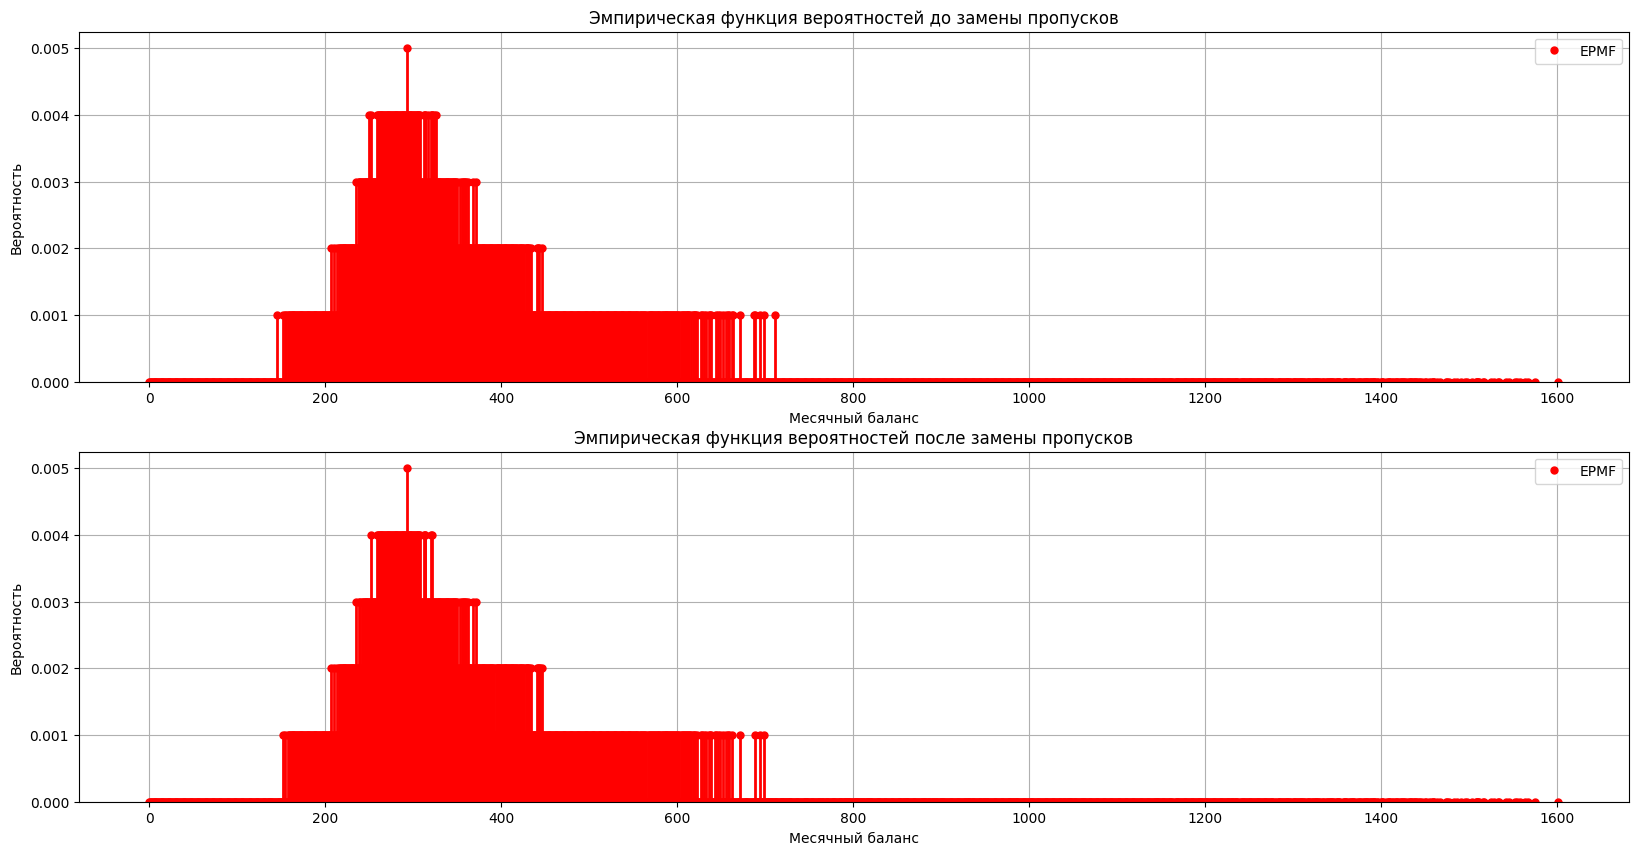

In [543]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(MB_uniq, MB_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(MB_uniq, 0, MB_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей до замены пропусков')
plt.xlabel('Месячный баланс')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(MB_zam_uniq, MB_zam_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(MB_zam_uniq, 0, MB_zam_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей после замены пропусков')
plt.xlabel('Месячный баланс')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

### Type_of_Loan

In [544]:
print(df['Type_of_Loan'].isna().sum())
df[['Type_of_Loan']].head(20)

14867


,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
5,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
6,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
7,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
8,Credit-Builder Loan
9,Credit-Builder Loan


In [545]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: list(sorted(list(set(x.replace(', and ', ', ').split(', '))))) if x is not np.nan else x)
print(df['Type_of_Loan'][18])
df[['Type_of_Loan']].head(20)

['Auto Loan', 'Not Specified']


,Type_of_Loan
0,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
1,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
2,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
3,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
4,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
5,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
6,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
7,"[Auto Loan, Credit-Builder Loan, Home Equity L..."
8,[Credit-Builder Loan]
9,[Credit-Builder Loan]


In [546]:
print(df['Type_of_Loan'][0])
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: ', '.join(x) if x is not np.nan else x)
print(df['Type_of_Loan'][0])
df[['Type_of_Loan']].head(10)

['Auto Loan', 'Credit-Builder Loan', 'Home Equity Loan', 'Personal Loan']
Auto Loan, Credit-Builder Loan, Home Equity Loan, Personal Loan


,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
1,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
2,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
3,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
4,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
5,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
6,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
7,"Auto Loan, Credit-Builder Loan, Home Equity Lo..."
8,Credit-Builder Loan
9,Credit-Builder Loan


In [547]:
ToL = df['Type_of_Loan']
sub = [ToL[i:i + 8] for i in range(0, len(ToL), 8)]
sub[90:96]

[720    NaN
 721    NaN
 722    NaN
 723    NaN
 724    NaN
 725    NaN
 726    NaN
 727    NaN
 Name: Type_of_Loan, dtype: object,
 728    NaN
 729    NaN
 730    NaN
 731    NaN
 732    NaN
 733    NaN
 734    NaN
 735    NaN
 Name: Type_of_Loan, dtype: object,
 736    Student Loan
 737    Student Loan
 738    Student Loan
 739    Student Loan
 740    Student Loan
 741    Student Loan
 742    Student Loan
 743    Student Loan
 Name: Type_of_Loan, dtype: object,
 744    NaN
 745    NaN
 746    NaN
 747    NaN
 748    NaN
 749    NaN
 750    NaN
 751    NaN
 Name: Type_of_Loan, dtype: object,
 752    Credit-Builder Loan, Mortgage Loan, Not Specif...
 753    Credit-Builder Loan, Mortgage Loan, Not Specif...
 754    Credit-Builder Loan, Mortgage Loan, Not Specif...
 755    Credit-Builder Loan, Mortgage Loan, Not Specif...
 756    Credit-Builder Loan, Mortgage Loan, Not Specif...
 757    Credit-Builder Loan, Mortgage Loan, Not Specif...
 758    Credit-Builder Loan, Mortgage Loan, Not Spec

In [548]:
ToL.unique()[:10]

array(['Auto Loan, Credit-Builder Loan, Home Equity Loan, Personal Loan',
       'Credit-Builder Loan', 'Auto Loan, Not Specified', 'Not Specified',
       nan, 'Credit-Builder Loan, Mortgage Loan',
       'Auto Loan, Not Specified, Student Loan',
       'Auto Loan, Debt Consolidation Loan, Personal Loan',
       'Not Specified, Payday Loan',
       'Auto Loan, Credit-Builder Loan, Personal Loan'], dtype=object)

In [549]:
ToL = ToL.dropna()

In [550]:
ToL_uniq, ToL_freq = np.unique(ToL, return_counts=True)
ToL_epmf = (ToL_freq / len(ToL)).round(4)
ToL_epmf, ToL_epmf.sum()

(array([0.0149, 0.0071, 0.002 , 0.0019, 0.0008, 0.0011, 0.0006, 0.0002,
        0.0004, 0.0003, 0.0005, 0.0013, 0.0007, 0.0003, 0.0007, 0.0007,
        0.0008, 0.0005, 0.0008, 0.0006, 0.0004, 0.0006, 0.0006, 0.0003,
        0.0009, 0.0016, 0.0006, 0.0004, 0.0004, 0.0011, 0.0013, 0.0013,
        0.0016, 0.0015, 0.0006, 0.0001, 0.0003, 0.0004, 0.0004, 0.0009,
        0.0008, 0.0015, 0.0006, 0.0004, 0.0005, 0.0009, 0.0009, 0.0012,
        0.0014, 0.0009, 0.0012, 0.0003, 0.0004, 0.001 , 0.0003, 0.0008,
        0.002 , 0.0011, 0.0004, 0.0018, 0.0009, 0.0009, 0.0007, 0.0027,
        0.002 , 0.0005, 0.0016, 0.0005, 0.0002, 0.0006, 0.0011, 0.0004,
        0.0006, 0.0013, 0.0012, 0.0007, 0.0008, 0.0007, 0.0007, 0.0007,
        0.0016, 0.0006, 0.0004, 0.0006, 0.0008, 0.0007, 0.0004, 0.0008,
        0.0019, 0.0016, 0.0011, 0.001 , 0.0021, 0.0015, 0.0013, 0.0016,
        0.0013, 0.0012, 0.0011, 0.0002, 0.0008, 0.0009, 0.001 , 0.0014,
        0.0013, 0.0008, 0.0006, 0.0007, 0.0024, 0.0015, 0.0013, 

In [551]:
np.random.seed(13)

for i in range(len(sub)):
    if sub[i].isna().sum() == 8:
        sub[i] = sub[i].fillna(np.random.choice(ToL_uniq, p=ToL_epmf))
    
    elif sub[i].isna().sum() != 0:
        mode = sub[i].mode().iloc[0]
        sub[i] = sub[i].apply(lambda x: mode if pd.isna(x) else x)

sub[90:96]

[720    Mortgage Loan, Payday Loan
 721    Mortgage Loan, Payday Loan
 722    Mortgage Loan, Payday Loan
 723    Mortgage Loan, Payday Loan
 724    Mortgage Loan, Payday Loan
 725    Mortgage Loan, Payday Loan
 726    Mortgage Loan, Payday Loan
 727    Mortgage Loan, Payday Loan
 Name: Type_of_Loan, dtype: object,
 728    Credit-Builder Loan, Debt Consolidation Loan, ...
 729    Credit-Builder Loan, Debt Consolidation Loan, ...
 730    Credit-Builder Loan, Debt Consolidation Loan, ...
 731    Credit-Builder Loan, Debt Consolidation Loan, ...
 732    Credit-Builder Loan, Debt Consolidation Loan, ...
 733    Credit-Builder Loan, Debt Consolidation Loan, ...
 734    Credit-Builder Loan, Debt Consolidation Loan, ...
 735    Credit-Builder Loan, Debt Consolidation Loan, ...
 Name: Type_of_Loan, dtype: object,
 736    Student Loan
 737    Student Loan
 738    Student Loan
 739    Student Loan
 740    Student Loan
 741    Student Loan
 742    Student Loan
 743    Student Loan
 Name: Type_of_L

In [552]:
ToL_zam = pd.concat(sub, ignore_index=True)
ToL_zam

0        Auto Loan, Credit-Builder Loan, Home Equity Lo...
1        Auto Loan, Credit-Builder Loan, Home Equity Lo...
2        Auto Loan, Credit-Builder Loan, Home Equity Lo...
3        Auto Loan, Credit-Builder Loan, Home Equity Lo...
4        Auto Loan, Credit-Builder Loan, Home Equity Lo...
                               ...                        
99995                              Auto Loan, Student Loan
99996                              Auto Loan, Student Loan
99997                              Auto Loan, Student Loan
99998                              Auto Loan, Student Loan
99999                              Auto Loan, Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [553]:
ToL_zam.isna().sum()

0

In [554]:
ToL_zam_uniq, ToL_zam_freq = np.unique(ToL_zam, return_counts=True)
ToL_zam_epmf = (ToL_zam_freq / len(ToL_zam)).round(4)

In [555]:
ToL = ToL.dropna()
len(ToL), len(ToL_zam)

(85133, 100000)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_rez = ohe.fit_transform

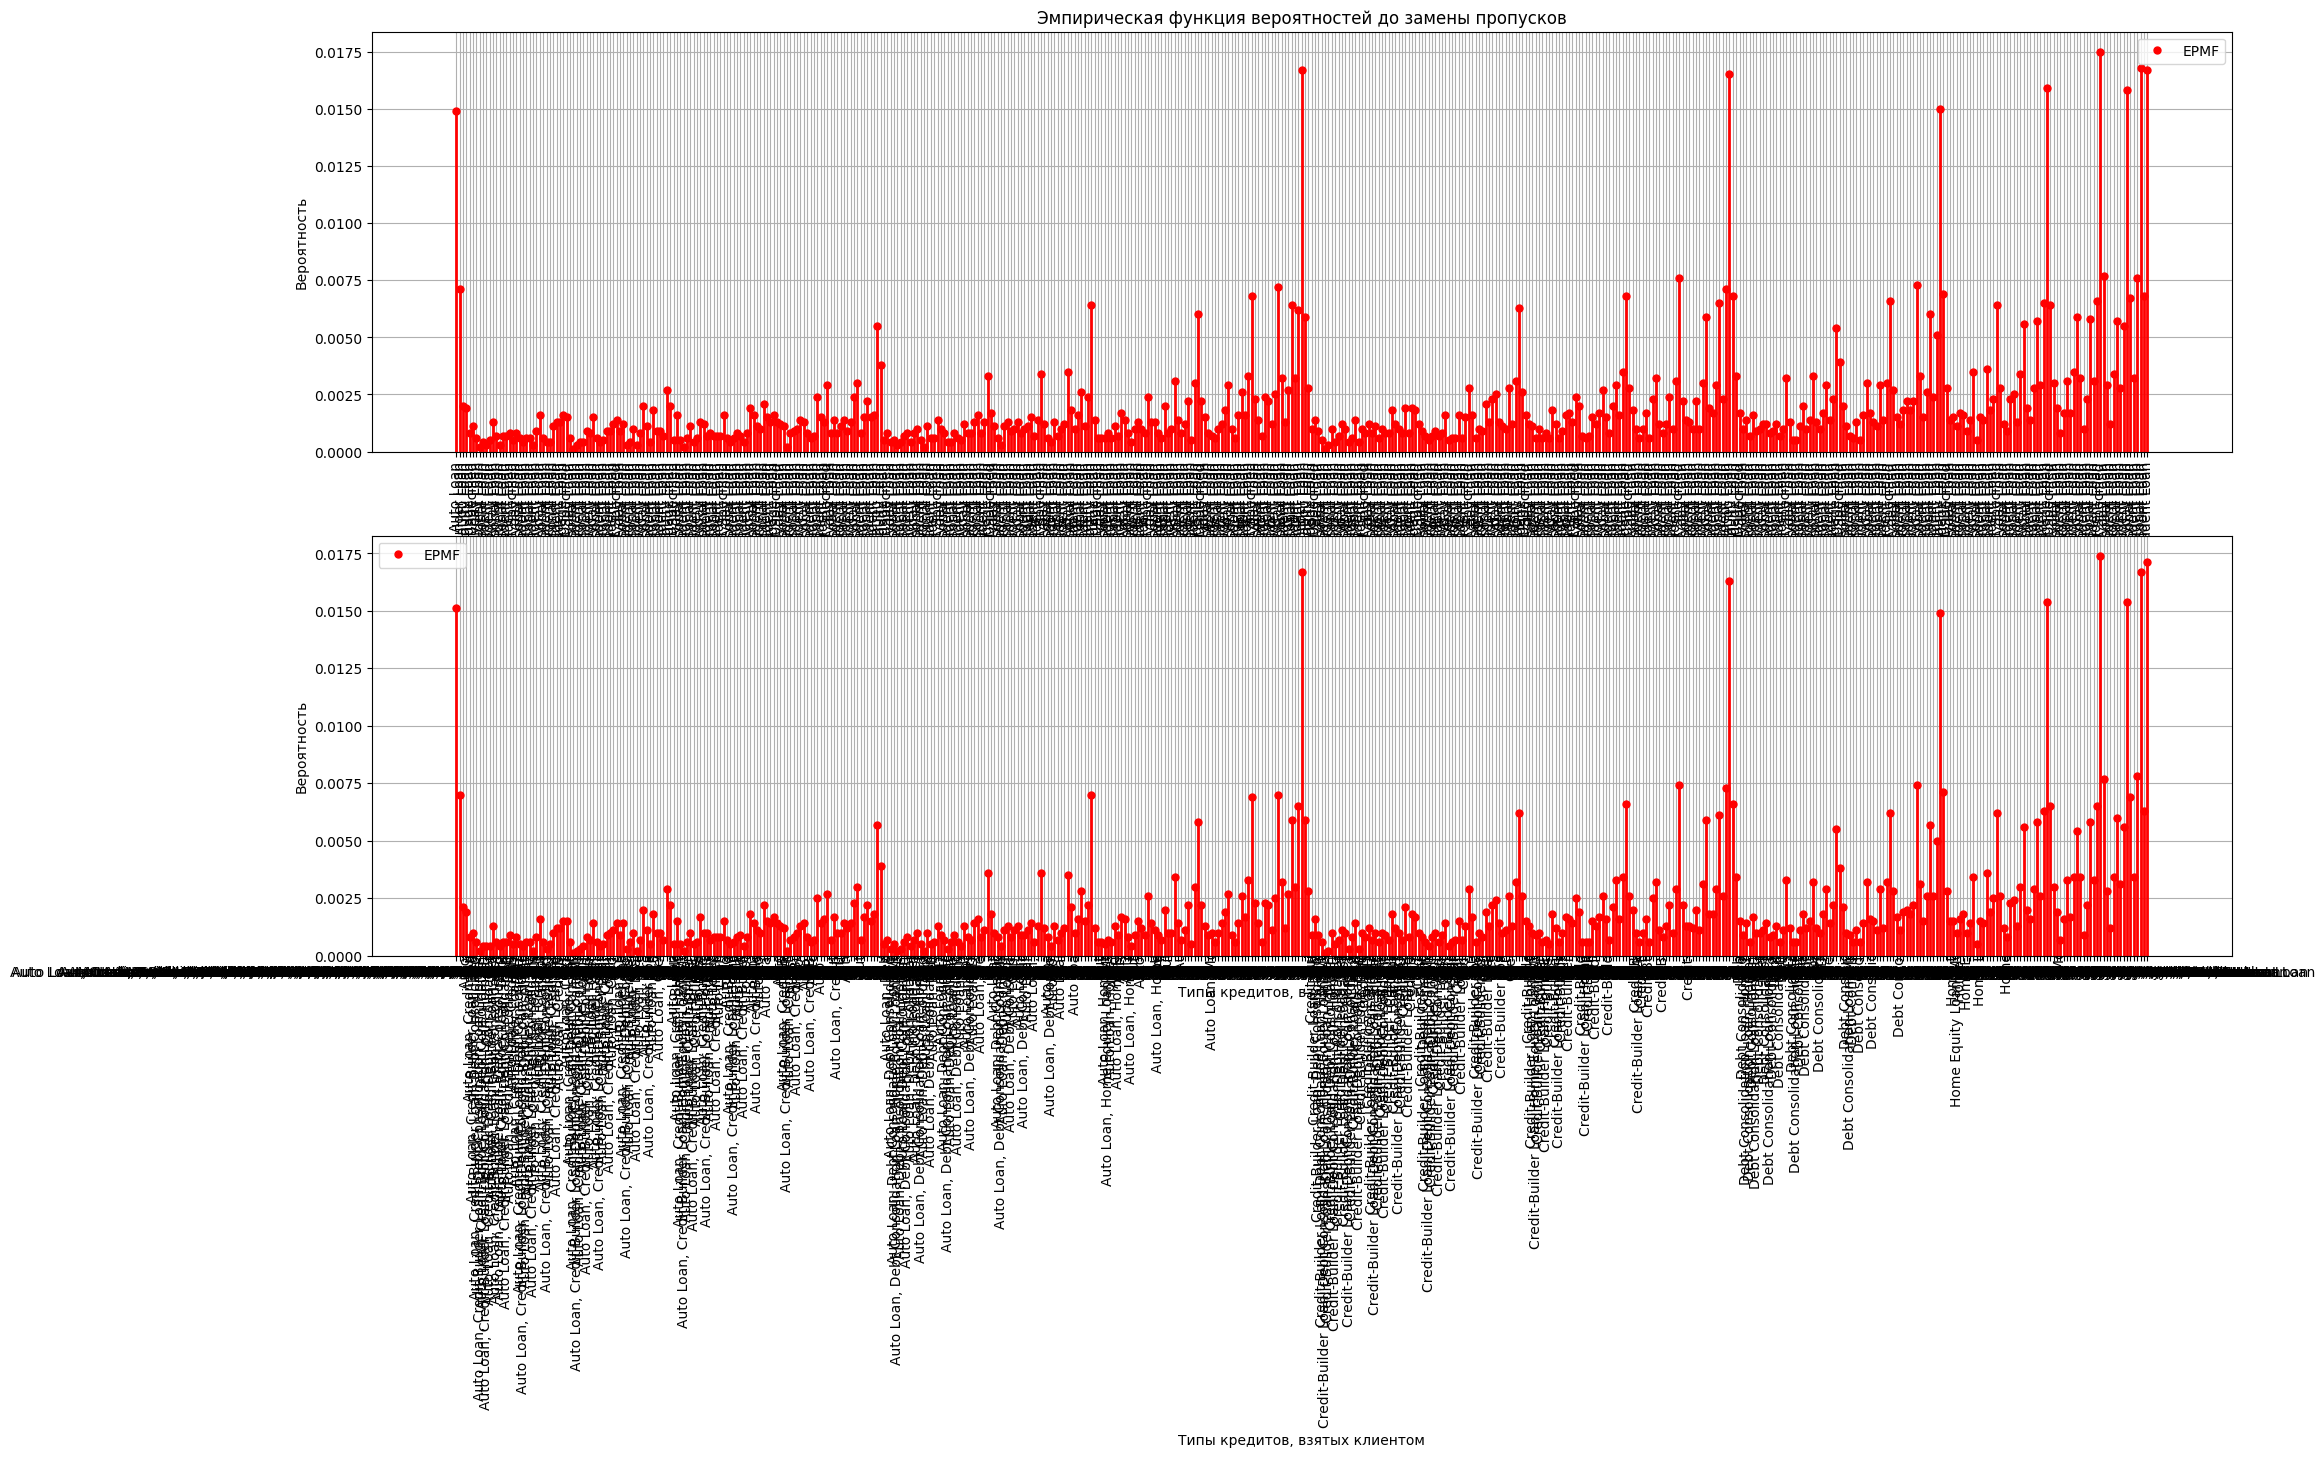

In [557]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 1, 1)
plt.plot(ToL_uniq, ToL_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(ToL_uniq, 0, ToL_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей до замены пропусков')
plt.xlabel('Типы кредитов, взятых клиентом')
plt.ylabel('Вероятность')
plt.xticks(rotation=90)
plt.ylim(0)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(ToL_zam_uniq, ToL_zam_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(ToL_zam_uniq, 0, ToL_zam_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей после замены пропусков')
plt.xlabel('Типы кредитов, взятых клиентом')
plt.ylabel('Вероятность')

plt.ylim(0)
plt.legend()
plt.grid()


### 7. Определить наличие статистических выбросов. Использовать графический и статистический методы. Credit_Utilization_Ratio

In [188]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [189]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

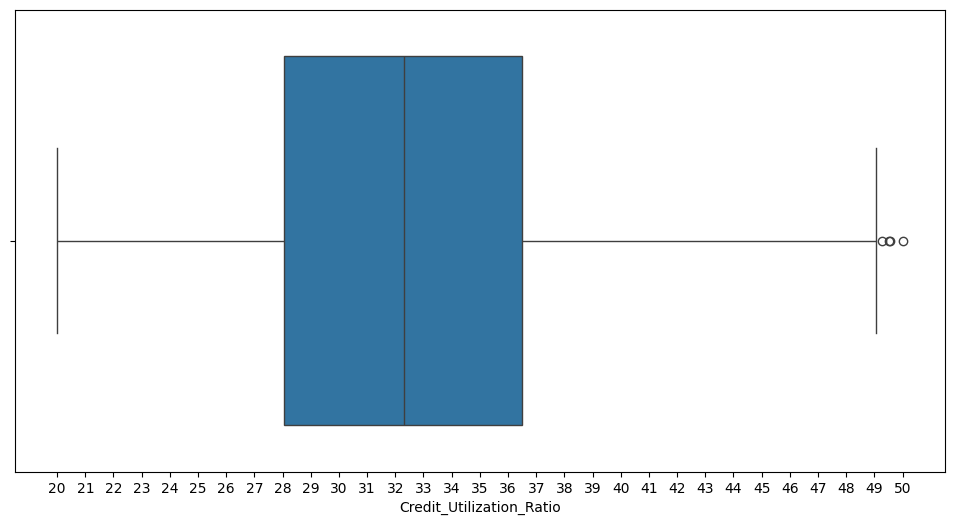

In [190]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Credit_Utilization_Ratio'])
plt.xticks(np.arange(20, 51, 1))
plt.show()

In [191]:
Q1 = df['Credit_Utilization_Ratio'].quantile(0.25)
Q3 = df['Credit_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Credit_Utilization_Ratio'] < lower_bound) | (df['Credit_Utilization_Ratio'] > upper_bound)]
print("Выбросы:")
print(outliers['Credit_Utilization_Ratio'])

Выбросы:
9382     50.000000
17029    49.522324
62954    49.254983
68000    49.564519
Name: Credit_Utilization_Ratio, dtype: float64


### 8. Закодировать категориальные признаки. Occupation

In [192]:
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,_______
9,Teacher


In [193]:
df['Occupation'].unique().tolist()

['Scientist',
 '_______',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 nan,
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [194]:
df['Occupation'] = df['Occupation'].fillna('tmp')
df['Occupation'] = df['Occupation'].replace(['_______', 'tmp'], np.nan)
df['Occupation'] = df['Occupation'].fillna('No_Info')
df[['Occupation']].head(10)

,Occupation
0,Scientist
1,Scientist
2,Scientist
3,Scientist
4,Scientist
5,Scientist
6,Scientist
7,Scientist
8,No_Info
9,Teacher


In [195]:
categories = df['Occupation'].unique().tolist()
categories

['Scientist',
 'No_Info',
 'Teacher',
 'Engineer',
 'Entrepreneur',
 'Developer',
 'Lawyer',
 'Media_Manager',
 'Doctor',
 'Journalist',
 'Manager',
 'Accountant',
 'Musician',
 'Mechanic',
 'Writer',
 'Architect']

In [196]:
occ = df[['Occupation']].copy()
occ = occ.astype({'Occupation' : 'category'})
occ.dtypes

Occupation    category
dtype: object

In [197]:
occ['Occupation'].cat.categories

Index(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'No_Info', 'Scientist', 'Teacher',
       'Writer'],
      dtype='object')

In [198]:
occ['Occupation_code'] = occ['Occupation'].cat.codes
occ.head(10)

,Occupation,Occupation_code
0,Scientist,13
1,Scientist,13
2,Scientist,13
3,Scientist,13
4,Scientist,13
5,Scientist,13
6,Scientist,13
7,Scientist,13
8,No_Info,12
9,Teacher,14


### 9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости. Credit_Utilization_Ratio

In [199]:
df[['Credit_Utilization_Ratio']].head(10)

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
5,27.262259
6,22.537593
7,23.933795
8,24.464031
9,38.550848


In [200]:
type(df['Credit_Utilization_Ratio'][0])

numpy.float64

In [201]:
df['Credit_Utilization_Ratio'].isna().sum()

3876

In [202]:
CUR = df['Credit_History_Age'].copy()
CUR = CUR.dropna()
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [203]:
CUR = np.round(CUR, decimals=0)
CUR

0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 87433, dtype: float64

In [206]:
CUR = CUR.astype(np.int64)

In [209]:
CUR_t = sts.randint.rvs(1, 405, size=len(CUR))

In [210]:
CUR_t_empf = sts.randint.pmf(CUR_t, 1, 405)
CUR_t_empf

array([0.00247525, 0.00247525, 0.00247525, ..., 0.00247525, 0.00247525,
       0.00247525])

In [211]:
CUR.mean(), CUR.std()

(221.09976782221815, 99.6888261022934)

In [212]:
CUR.min(), CUR.max()

(1, 404)

In [213]:
np.linspace(0, 406, 1000)[:5]

array([0.        , 0.40640641, 0.81281281, 1.21921922, 1.62562563])

In [214]:
norm_rv = sts.norm(loc=221.09, scale=99.6)
x = np.linspace(0, 406, 1000)
norm_pdf = norm_rv.pdf(x)
norm_pdf[:10]

array([0.00034094, 0.00034404, 0.00034716, 0.0003503 , 0.00035347,
       0.00035666, 0.00035987, 0.00036311, 0.00036636, 0.00036965])

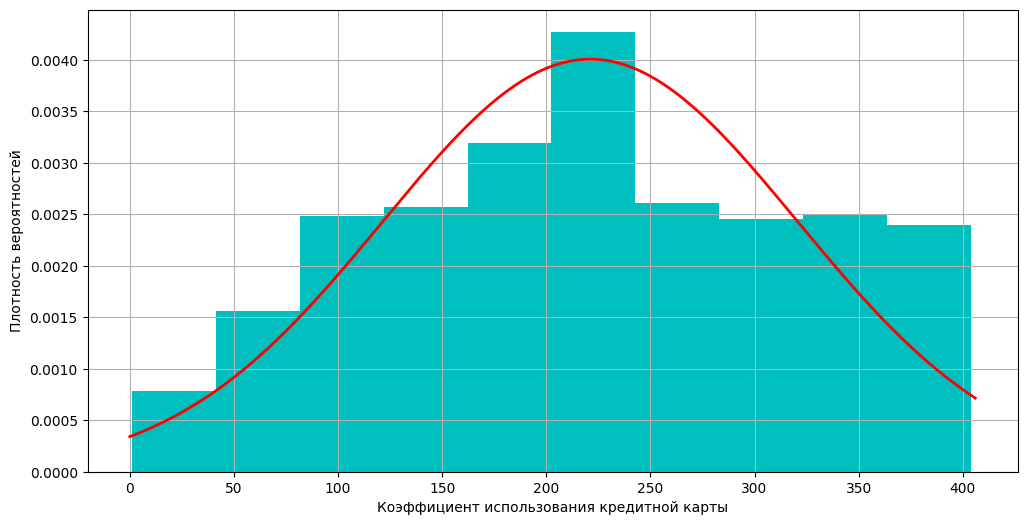

In [215]:
plt.figure(figsize=(12,6))
plt.hist(CUR, color='c', bins=10, density=True)
plt.plot(x, norm_pdf, color='r', lw=2)
plt.xlabel('Коэффициент использования кредитной карты')
plt.ylabel('Плотность вероятностей')
plt.grid()
plt.show()

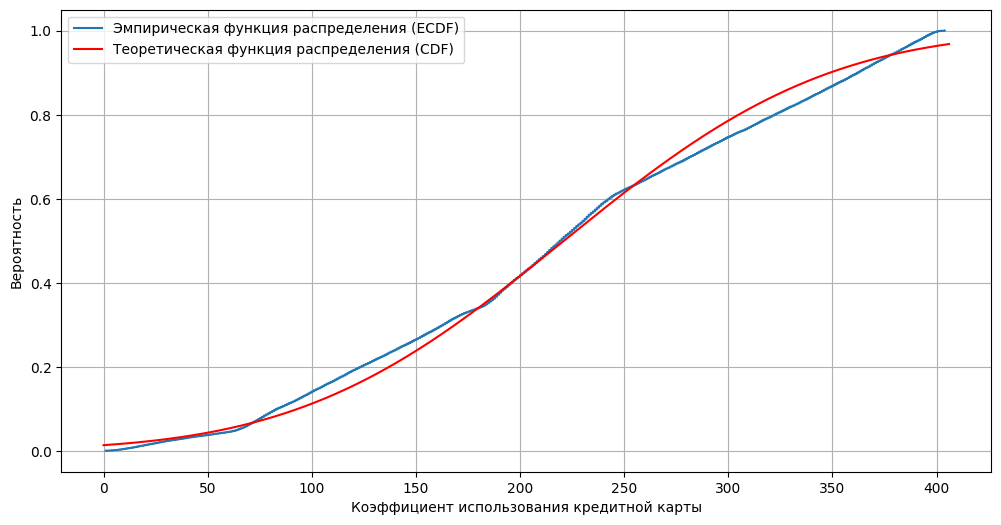

In [216]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(12, 6))
ecdf = ECDF(CUR)
plt.plot(ecdf.x, ecdf.y, label='Эмпирическая функция распределения (ECDF)')
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, color='r', label='Теоретическая функция распределения (CDF)')
plt.xlabel('Коэффициент использования кредитной карты')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

### 10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости. Провести визуальный анализ зависимости. Сделать вывод. Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла. Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.

Interest_Rate: процентная ставка по кредитной карте

Credit_Utilization_Ratio: коэффициент использования кредитной карты

In [82]:
tmp = df[['Monthly_Inhand_Salary', 'Monthly_Balance']].copy()
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,NaN,285.0
2,NaN,331.0
3,NaN,223.0
4,1824.843333,341.0
5,NaN,340.0
6,1824.843333,245.0
7,1824.843333,358.0
8,3037.986667,471.0
9,3037.986667,485.0


In [83]:
tmp.isna().sum()

Monthly_Inhand_Salary    18297
Monthly_Balance              0
dtype: int64

In [84]:
tmp = tmp.dropna().reset_index(drop=True)
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1824.843333,312.0
1,1824.843333,341.0
2,1824.843333,245.0
3,1824.843333,358.0
4,3037.986667,471.0
5,3037.986667,485.0
6,3037.986667,466.0
7,3037.986667,445.0
8,3037.986667,482.0
9,3037.986667,356.0


In [85]:
tmp.corr()

,Monthly_Inhand_Salary,Monthly_Balance
Monthly_Inhand_Salary,1.000000,0.704053
Monthly_Balance,0.704053,1.000000


In [86]:
type(tmp['Monthly_Balance'][0])

numpy.float64

In [87]:
tmp['Monthly_Inhand_Salary'] = np.round(tmp['Monthly_Inhand_Salary'], decimals=0)

In [88]:
tmp.head(10)

,Monthly_Inhand_Salary,Monthly_Balance
0,1825.0,312.0
1,1825.0,341.0
2,1825.0,245.0
3,1825.0,358.0
4,3038.0,471.0
5,3038.0,485.0
6,3038.0,466.0
7,3038.0,445.0
8,3038.0,482.0
9,3038.0,356.0


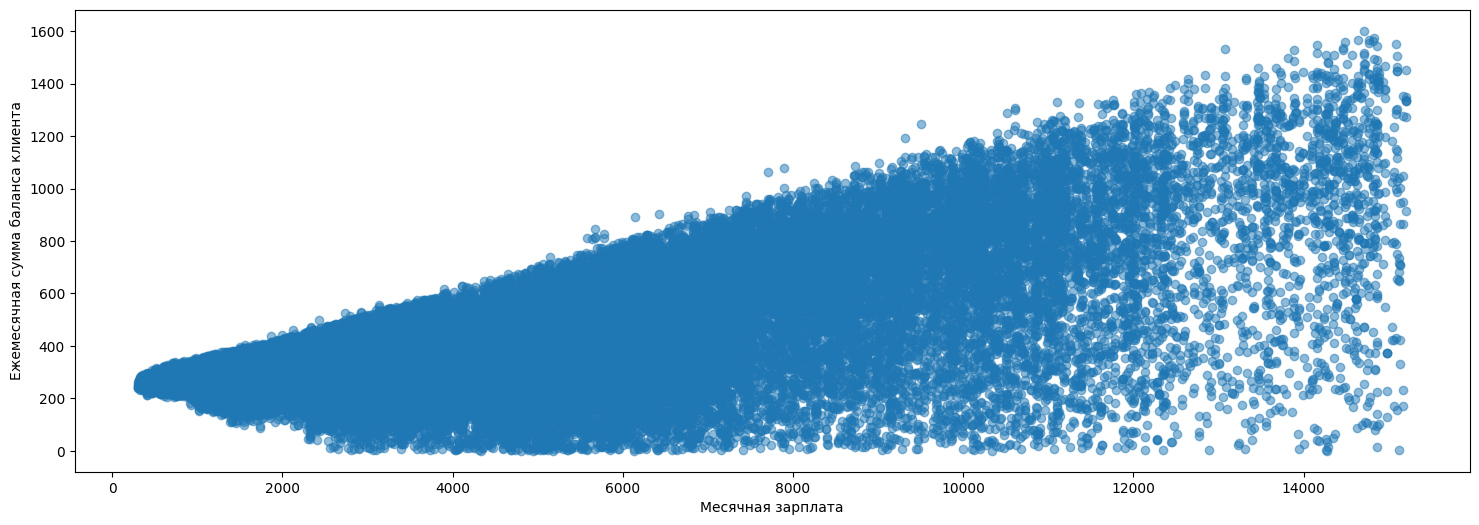

In [89]:
plt.figure(figsize=(18, 6))
plt.scatter(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance'], alpha=0.5)
plt.xlabel('Месячная зарплата')
plt.ylabel('Ежемесячная сумма баланса клиента')
plt.show()

#### **Вывод:** В результате визуального анализа зависимости признака Monthly_Inhand_Salary от признака Monthly_Balance можно сказать, что признаки имеют положительную зависимость. Рост одного признака связан с ростом другого, но не во всех случаях.

In [90]:
def pearson(x, y):

    sred_x = sum(x) / len(x)
    sred_y = sum(y) / len(y)

    numerator = 0
    denominator_x = 0
    denominator_y = 0

    for xi, yi in zip(x, y):
        numerator += (xi - sred_x) * (yi - sred_y)
        denominator_x += (xi - sred_x) ** 2
        denominator_y += (yi - sred_y) ** 2

    denominator = (denominator_x * denominator_y) ** 0.5
    
    return numerator / denominator

def spearman(x, y):

    ranked_x = [sorted(x).index(i) + 1 for i in x]
    ranked_y = [sorted(y).index(i) + 1 for i in y]

    mean_rank_x = sum(ranked_x) / len(ranked_x)
    mean_rank_y = sum(ranked_y) / len(ranked_y)

    sum_rank_x_sq = sum((ri - mean_rank_x) ** 2 for ri in ranked_x)
    sum_rank_y_sq = sum((ri - mean_rank_y) ** 2 for ri in ranked_y)

    sum_rank_xy = sum((ri - mean_rank_x) * (ri - mean_rank_y) for ri, rj in zip(ranked_x, ranked_y))

    return sum_rank_xy / ((sum_rank_x_sq * sum_rank_y_sq) ** 0.5)

def kendall(x, y):
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    
    n = len(x)
    concordant = 0
    discordant = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                concordant += 1
            elif (x[i] - x[j]) * (y[i] - y[j]) < 0:
                discordant += 1

    return (concordant - discordant) / (0.5 * n * (n - 1))

In [91]:
print('Коэффициент корреляции Пирсона:', pearson(tmp['Monthly_Inhand_Salary'], tmp['Monthly_Balance']))
print('Коэффициент корреляции Спирмена:', spearman(tmp['Monthly_Inhand_Salary'][::10], tmp['Monthly_Balance'][::10]))
print('Коэффициент корреляции Кендалла:', kendall(tmp['Monthly_Inhand_Salary'][:3000], tmp['Monthly_Balance'][:3000]))

Коэффициент корреляции Пирсона: 0.7040528927385118
Коэффициент корреляции Спирмена: 0.998855574148472
Коэффициент корреляции Кендалла: 0.4378995220629099


#### **Вывод:** Все три коэффициента корреляции демонстрируют положительную связь между месячной зарплатой и месячным балансом, указывая на то, что рост одного признака связан с ростом другого

### 11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости. Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод. Написать функцию для расчета корреляционного отношения. Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.

In [92]:
tmp = df[['Occupation', 'Credit_Utilization_Ratio']].copy()
tmp.head(10)

,Occupation,Credit_Utilization_Ratio
0,Scientist,26.822620
1,Scientist,31.944960
2,Scientist,28.609352
3,Scientist,31.377862
4,Scientist,24.797347
5,Scientist,27.262259
6,Scientist,22.537593
7,Scientist,23.933795
8,No_Info,24.464031
9,Teacher,38.550848


In [93]:
tmp.isna().sum()

Occupation                     0
Credit_Utilization_Ratio    3876
dtype: int64

In [94]:
type(tmp['Credit_Utilization_Ratio'][0])

numpy.float64

In [95]:
tmp = tmp.dropna().reset_index(drop=True)
tmp['Credit_Utilization_Ratio'] = np.round(tmp['Credit_Utilization_Ratio'], decimals=0)
tmp.head()

,Occupation,Credit_Utilization_Ratio
0,Scientist,27.0
1,Scientist,32.0
2,Scientist,29.0
3,Scientist,31.0
4,Scientist,25.0


In [96]:
credit = tmp['Credit_Utilization_Ratio']
credit_uniq, credit_freq = np.unique(credit, return_counts=True)

In [97]:
credit_epmf = (credit_freq / len(credit)).round(3)

In [98]:
occ_uniq, occ_freq = np.unique(tmp['Occupation'], return_counts=True)
occ_epmf = (occ_freq / len(tmp['Occupation'])).round(3)
print(occ_uniq)
print(occ_freq)
print(occ_epmf)

['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'No_Info' 'Scientist' 'Teacher' 'Writer']
[6036 6097 5981 5842 6080 5940 5859 6318 5743 6065 5946 5694 6777 6069
 5993 5684]
[0.063 0.063 0.062 0.061 0.063 0.062 0.061 0.066 0.06  0.063 0.062 0.059
 0.071 0.063 0.062 0.059]


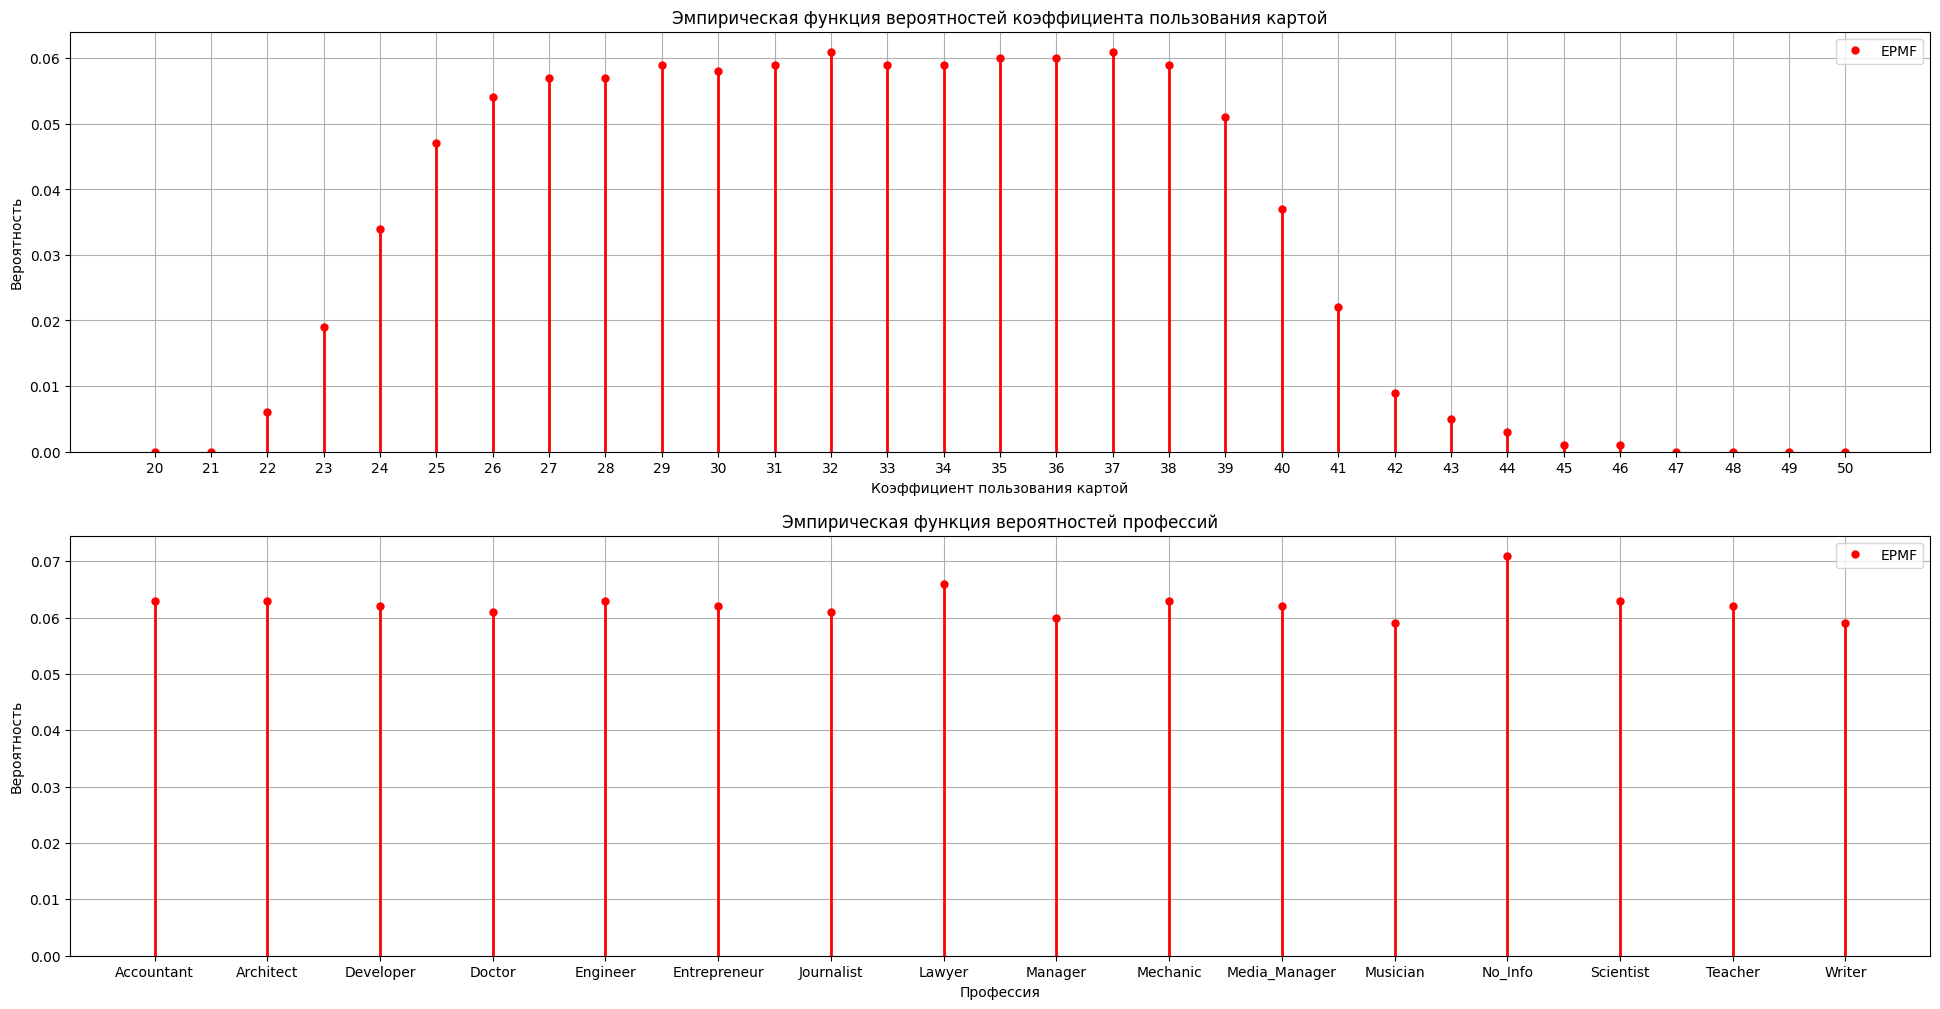

In [99]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 1, 1)
plt.plot(credit_uniq, credit_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(credit_uniq, 0, credit_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей коэффициента пользования картой')
plt.xlabel('Коэффициент пользования картой')
plt.ylabel('Вероятность')
plt.legend()
plt.xticks(np.arange(20, 51, 1))
plt.ylim(0)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(occ_uniq, occ_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(occ_uniq, 0, occ_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей профессий')
plt.xlabel('Профессия')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

plt.show()

In [100]:
tmp_x = list()
occupations = tmp['Occupation'].unique().tolist()

for i in occupations:
    tmp_x.append(tmp['Credit_Utilization_Ratio'][tmp['Occupation'] == i])

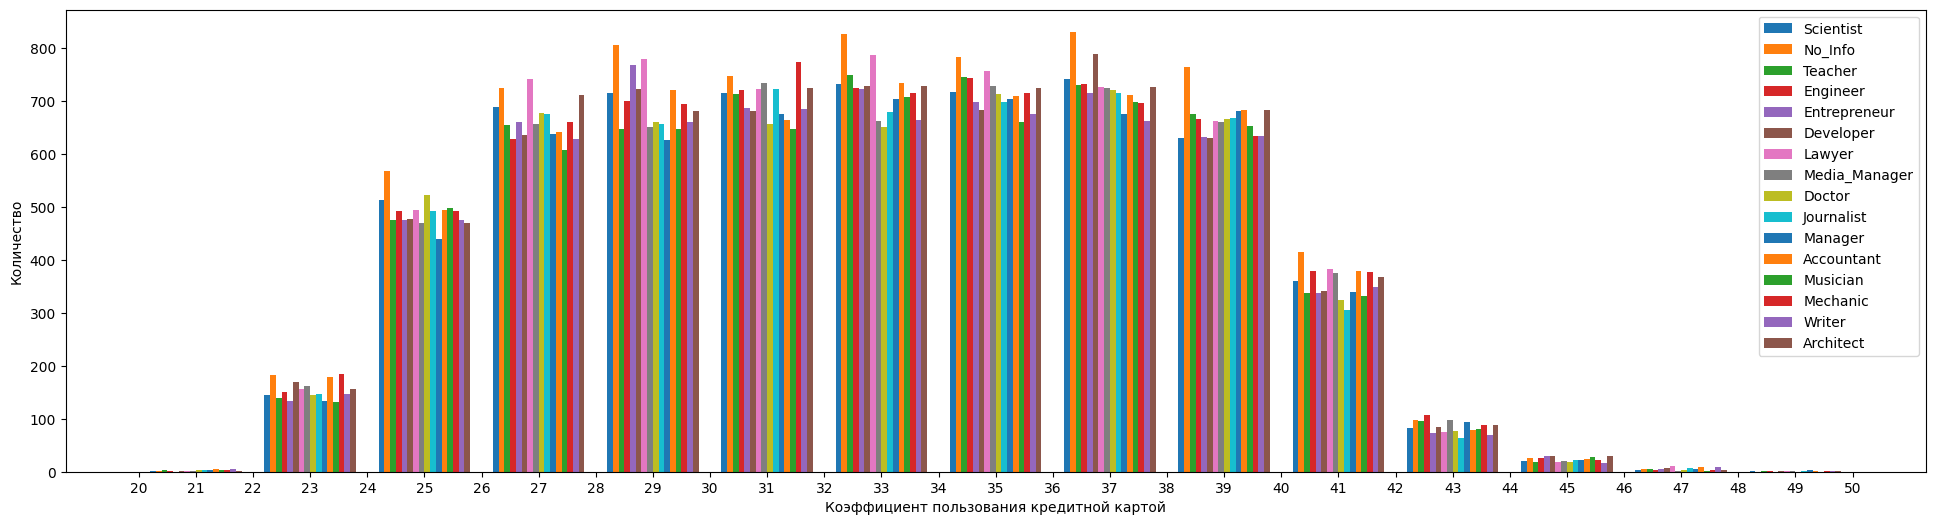

In [101]:
plt.figure(figsize=(24, 6))
plt.hist(tmp_x, bins=15)
plt.xticks(np.arange(20, 51, 1))
plt.xlabel('Коэффициент пользования кредитной картой')
plt.ylabel('Количество')
plt.legend(tmp['Occupation'].unique())
plt.show()

In [102]:
from statsmodels.distributions.empirical_distribution import ECDF

tmp_ecdf = list()

for i in occupations:
    tmp_ecdf.append(ECDF(tmp['Credit_Utilization_Ratio'][tmp['Occupation'] == i]))

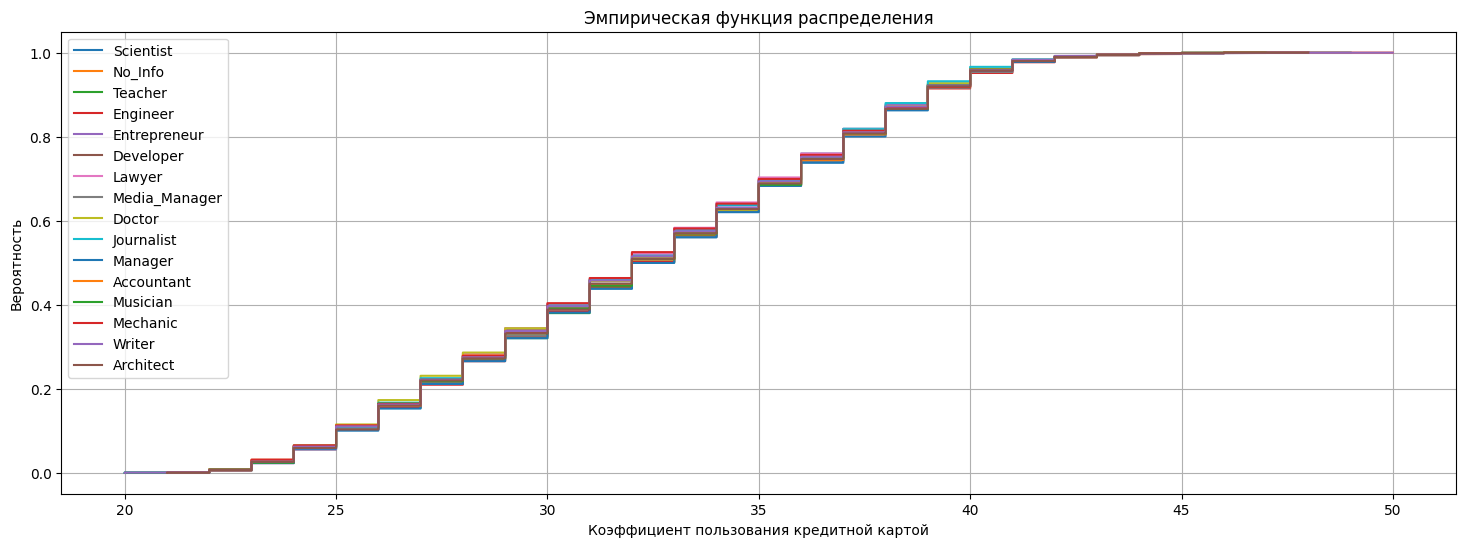

In [103]:
plt.figure(figsize=(18, 6))
for i in tmp_ecdf:
    plt.step(i.x, i.y)
plt.title('Эмпирическая функция распределения')
plt.ylabel('Вероятность')
plt.xlabel('Коэффициент пользования кредитной картой')
plt.legend(tmp['Occupation'].unique())
plt.grid()
plt.show()

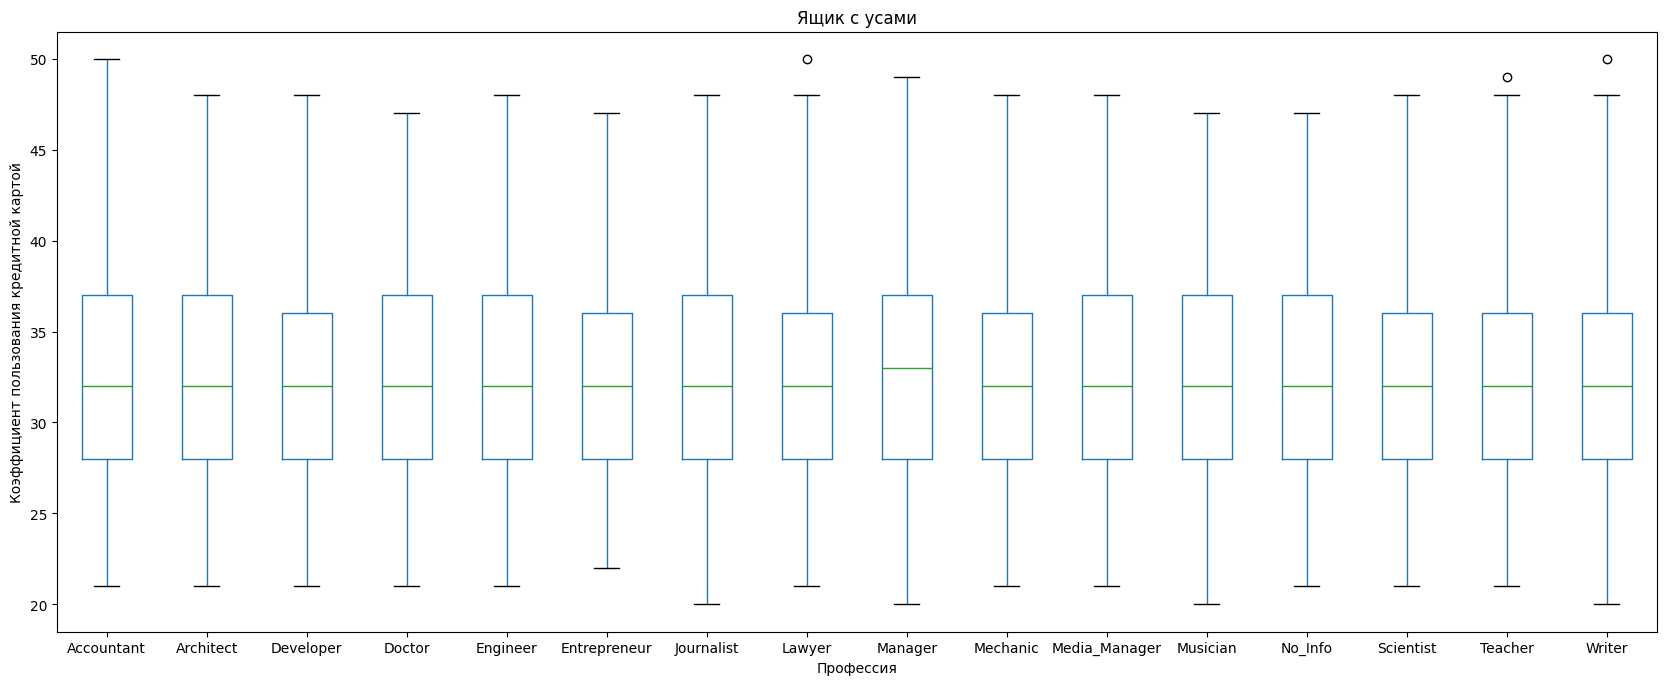

In [104]:
tmp.boxplot(column='Credit_Utilization_Ratio', by='Occupation', grid=False, figsize=(20, 8))
plt.title('Ящик c усами')
plt.suptitle('')
plt.xlabel('Профессия')
plt.ylabel('Коэффициент пользования кредитной картой')
plt.show()

#### **Вывод:** Оба признака демонстрируют умеренную корреляцию между собой. Также присутствуют выбросы и заметен рост вероятности при росте коэффициента пользования кредитной картой

In [105]:
def correlation(cat, val):

    cat_uniq = cat.unique()
    mean = np.mean(val)

    S_total = sum([(i - mean) ** 2 for i in val])
    S_between = 0

    for i in cat_uniq:
        cat_values = val[cat == i]
        cat_mean = np.mean(cat_values)
        n = len(cat_values)
        S_between += n * (cat_mean - mean) ** 2

    return (S_between / S_total) ** 0.5    

In [106]:
tmp['Occupation'] = tmp['Occupation'].astype('category')
tmp['Occupation_code'] = tmp['Occupation'].cat.codes
tmp.head()

,Occupation,Credit_Utilization_Ratio,Occupation_code
0,Scientist,27.0,13
1,Scientist,32.0,13
2,Scientist,29.0,13
3,Scientist,31.0,13
4,Scientist,25.0,13


In [107]:
print(correlation(tmp['Occupation_code'], tmp['Credit_Utilization_Ratio']))

0.015484118610015234


#### **Вывод:** Значение коэффициента корреляции равное 0.015 говорит о том, что между двумя признаками присутствует малая зависимость. Это означает, что знание значения одного признака практически не дает информацию о значении другого.

### 12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости. Провести визуальный анализ зависимости. Сделать вывод. Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона. Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.
 
Payment_Behaviour: платежное поведение клиента 


Credit_Score: кредитная оценка клиента

In [108]:
tmp = df[['Payment_Behaviour', 'Credit_Score']].copy()
tmp.head(15)

,Payment_Behaviour,Credit_Score
0,High_spent_Small_value_payments,Good
1,Low_spent_Large_value_payments,Good
2,Low_spent_Medium_value_payments,Good
3,Low_spent_Small_value_payments,Good
4,High_spent_Medium_value_payments,Good
5,!@9#%8,Good
6,Low_spent_Small_value_payments,Good
7,High_spent_Medium_value_payments,Standard
8,Low_spent_Small_value_payments,Standard
9,High_spent_Large_value_payments,Good


In [109]:
print(tmp['Payment_Behaviour'].unique())
print(tmp['Credit_Score'].unique())

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments' nan]
['Good' 'Standard' nan 'Poor']


In [110]:
tmp.loc[tmp['Payment_Behaviour'] == '!@9#%8', 'Payment_Behaviour'] = np.nan

In [111]:
tmp = tmp.dropna().reset_index(drop=True)

In [112]:
tmp = tmp.astype({'Payment_Behaviour' : 'category', 'Credit_Score' : 'category'})

In [113]:
PB_codes = tmp['Payment_Behaviour'].cat.codes
CS_codes = tmp['Credit_Score'].cat.codes

print(PB_codes.unique())
print(tmp['Payment_Behaviour'].cat.categories)

print(CS_codes.unique())
print(tmp['Credit_Score'].cat.categories)

[2 3 4 5 1 0]
Index(['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments'],
      dtype='object')
[0 2 1]
Index(['Good', 'Poor', 'Standard'], dtype='object')


In [114]:
conf_matr = pd.crosstab(tmp['Payment_Behaviour'], tmp['Credit_Score'])
conf_matr

Credit_Score,Good,Poor,Standard
Payment_Behaviour,,,
High_spent_Large_value_payments,3032,2866,7253
High_spent_Medium_value_payments,3394,4249,9216
High_spent_Small_value_payments,2010,2987,5889
Low_spent_Large_value_payments,1804,2830,5425
Low_spent_Medium_value_payments,2381,4067,6881
Low_spent_Small_value_payments,3132,8771,12638


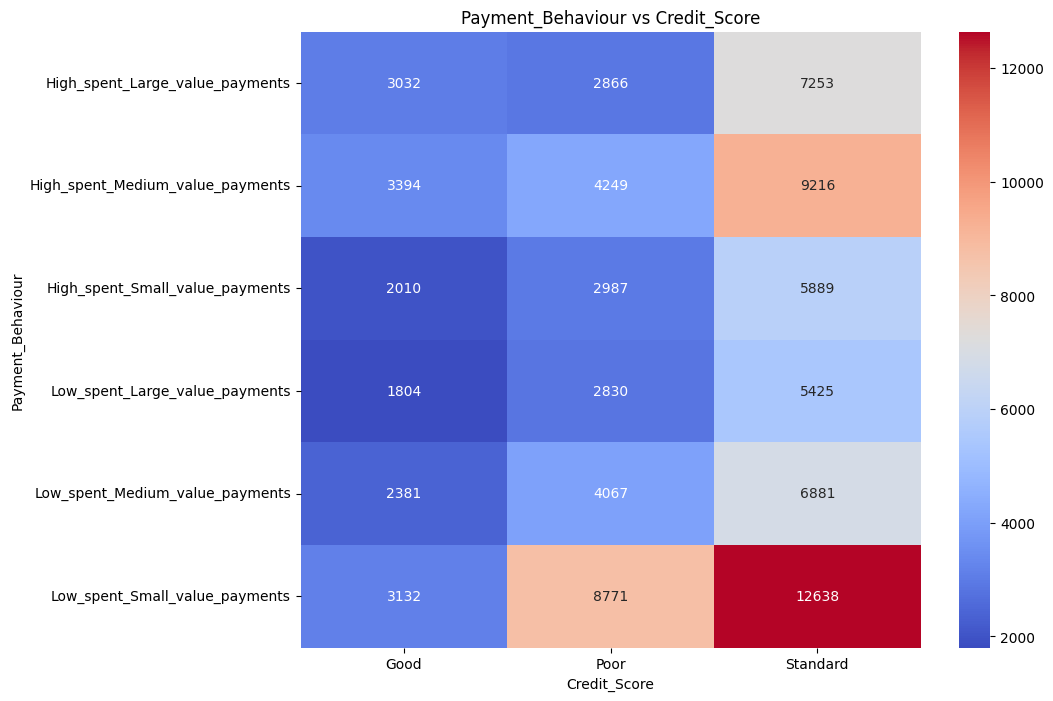

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap='coolwarm')
plt.title('Payment_Behaviour vs Credit_Score')
plt.ylabel('Payment_Behaviour')
plt.xlabel('Credit_Score')
plt.show()

#### **Вывод:** Можно увидеть что наибольшее количество раз встречается комбинация Low_spent_Small_value_payments и Standard. 

In [116]:
def assotz(matrix):
    
    N = sum(sum(row) for row in matrix)
    
    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]
    
    numerator = N * sum(a * b / N for row, col in zip(matrix, zip(*matrix)) for a, b in zip(row, col)) - sum(a * b for a, b in zip(row_sums, col_sums))
    
    sum_row_squared = sum(a ** 2 for a in row_sums)
    sum_col_squared = sum(a ** 2 for a in col_sums)
    denominator = (sum_row_squared - N) ** 0.5 * (sum_col_squared - N) ** 0.5
    
    return numerator / denominator

def contingency(matrix):
    
    N = sum(sum(row) for row in matrix)
    
    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]
    
    expected = [[a * b / N for b in col_sums] for a in row_sums]
    
    chi_2 = sum((a - b) ** 2 / b for row, col in zip(matrix, expected) for a, b in zip(row, col))
    
    return (chi_2 / (N + chi_2)) ** 0.5

def chuprov(matrix):
    
    N = sum(sum(row) for row in matrix)
    
    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]
    
    expected = [[a * b / N for b in col_sums] for a in row_sums]
    
    chi_2 = sum((a - b) ** 2 / b for row, col in zip(matrix, expected) for a, b in zip(row, col))
    
    r, c = len(matrix), len(matrix[0])
    
    return (chi_2 / (N * ((r - 1) * (c - 1)) ** 0.5)) ** 0.5

def pearson_coef(matrix):
    
    N = sum(sum(row) for row in matrix)
   
    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]
    
    expected = [[a * b / N for b in col_sums] for a in row_sums]
    
    chi_2 = sum((a - b) ** 2 / b for row, col in zip(matrix, expected) for a, b in zip(row, col))
    
    r, c = len(matrix), len(matrix[0])
    
    return (chi_2 / (N * min(r - 1, c - 1))) ** 0.5

In [117]:
matrix = conf_matr.values.tolist()
matrix

[[3032, 2866, 7253],
 [3394, 4249, 9216],
 [2010, 2987, 5889],
 [1804, 2830, 5425],
 [2381, 4067, 6881],
 [3132, 8771, 12638]]

In [118]:
print('Коэффициент ассоциации:', assotz(matrix))
print('Коэффициент контингенции:', contingency(matrix))
print('Коэффициент взаимной сопряженности Чупрова:', chuprov(matrix))
print('Коэффициент взаимной сопряженности Пирсона:', pearson_coef(matrix))

Коэффициент ассоциации: -0.4626369761387718
Коэффициент контингенции: 0.12344052825938072
Коэффициент взаимной сопряженности Чупрова: 0.06995069513086627
Коэффициент взаимной сопряженности Пирсона: 0.0879583424871106


#### **Вывод:** Большинство коэффициентов указывают на очень слабую зависимость между признаками.